Median Filter - PSNR: 18.71003643601256, SSIM: 0.2128802453505891, MSE: 0.01345849062736094


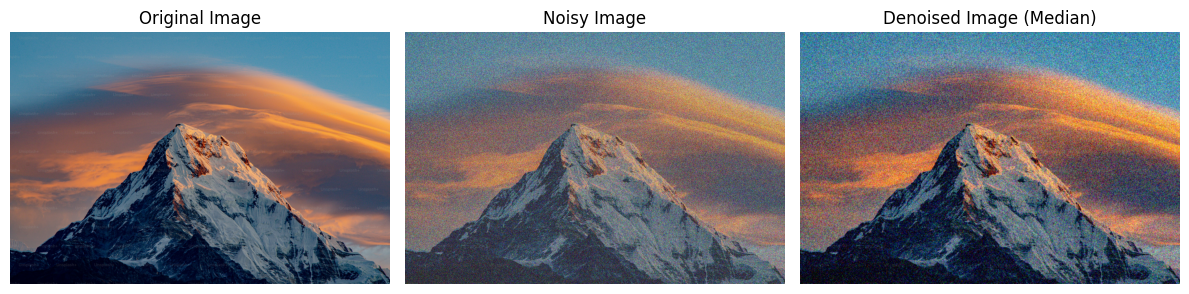

In [1]:
import numpy as np
from skimage import io
from skimage.filters import median
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

# Load the image
image = io.imread('TODAY.jpeg')  # Replace with your image path
image = image / 255.0  # Normalize if not already

# Add Gaussian noise to the image
noisy_image = image + 0.5 * np.random.randn(*image.shape)
noisy_image = np.clip(noisy_image, 0, 1)  # Ensure values are in [0, 1]

# Apply Median Filter on each channel separately
denoised_image = np.zeros_like(noisy_image)
for i in range(noisy_image.shape[2]):  # Loop over each color channel (RGB)
    denoised_image[..., i] = median(noisy_image[..., i], disk(3))

# Compute Metrics
data_range = 1.0  # Since images are normalized
psnr_value = psnr(image, denoised_image, data_range=data_range)
ssim_value = ssim(image, denoised_image, win_size=3, channel_axis=-1, data_range=data_range)
mse_value = np.mean([mse(image[..., i].flatten(), denoised_image[..., i].flatten()) for i in range(image.shape[2])])

print(f"Median Filter - PSNR: {psnr_value}, SSIM: {ssim_value}, MSE: {mse_value}")

# Display Original and Denoised Images
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(denoised_image)
plt.title("Denoised Image (Median)")
plt.axis("off")

plt.tight_layout()
plt.show()


In [3]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 53.0 MB/s eta 0:00:00


Wavelet Denoising - PSNR: 20.1735994407489, SSIM: 0.6023359734531534, MSE: 0.00960815622518166


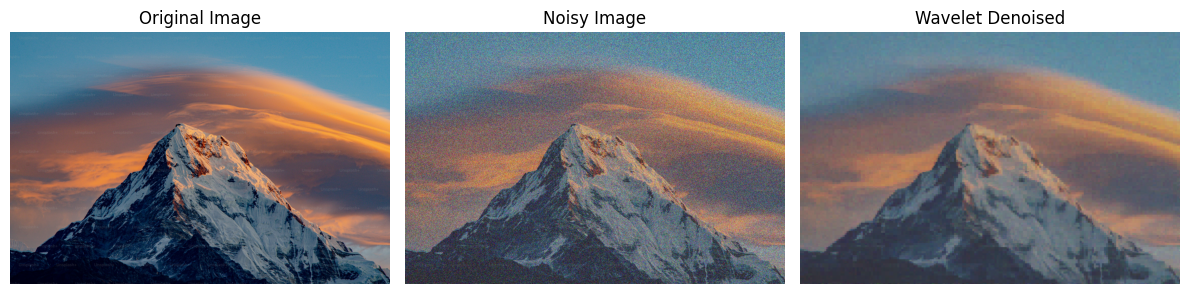

In [4]:
import numpy as np
from skimage import io
from skimage.restoration import denoise_wavelet
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt

# Load and normalize the image
image = io.imread('TODAY.jpeg')  # Replace with your image path
image = image / 255.0  # Normalize to [0, 1] if not already

# Add Gaussian noise to the image
noisy_image = image + 0.5 * np.random.randn(*image.shape)
noisy_image = np.clip(noisy_image, 0, 1)  # Clip to [0, 1]

# Apply Wavelet Denoising on each channel separately
denoised_image_wavelet = np.zeros_like(noisy_image)
for i in range(noisy_image.shape[2]):
    denoised_image_wavelet[..., i] = denoise_wavelet(
        noisy_image[..., i],
        method='BayesShrink',
        mode='soft',
        rescale_sigma=True
    )

# Compute metrics
psnr_wavelet = psnr(image, denoised_image_wavelet, data_range=1.0)
ssim_wavelet = ssim(image, denoised_image_wavelet, win_size=3, channel_axis=-1, data_range=1.0)
mse_wavelet = np.mean([
    mse(image[..., i].flatten(), denoised_image_wavelet[..., i].flatten())
    for i in range(image.shape[2])
])

print(f"Wavelet Denoising - PSNR: {psnr_wavelet}, SSIM: {ssim_wavelet}, MSE: {mse_wavelet}")

# Display images
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(denoised_image_wavelet)
plt.title("Wavelet Denoised")
plt.axis("off")

plt.tight_layout()
plt.show()


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0683
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0637
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0658
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0606
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0599
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0566
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0546
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0532
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0507
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0476
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step


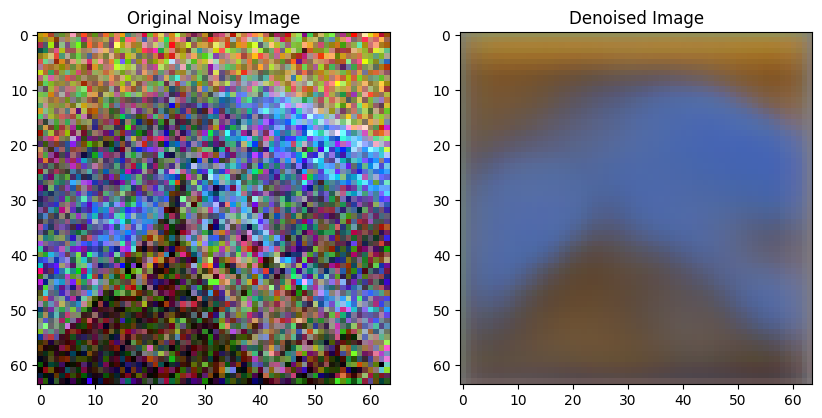

PSNR: 13.261268827182583, SSIM: 0.04264898363247771, MSE: 0.0471925144293762


In [6]:
import numpy as np
import cv2
import tensorflow as tf
from skimage import io
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error as mse

# Step 1: Load your clean image and add noise to it

def add_noise(image, noise_factor=0.3):
    """Add Gaussian noise to the image."""
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip to valid pixel range
    return noisy_image

# Load your clean image
image = io.imread('TODAY.jpeg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# Normalize the image to float32 for TensorFlow
image = np.asarray(image, dtype=np.float32) / 255.0

# Add noise to the image
noisy_image = add_noise(image)

# Step 2: Build the Noise2Void Model (Simple U-Net)

def build_n2v_model(input_shape):
    """Build a U-Net-like model for denoising."""
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    outputs = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 3: Prepare patches for training

def generate_patches(image, patch_size=64, stride=32):
    """Generate patches from the image for self-supervised learning."""
    patches = []
    for i in range(0, image.shape[0] - patch_size + 1, stride):
        for j in range(0, image.shape[1] - patch_size + 1, stride):
            patch = image[i:i+patch_size, j:j+patch_size]
            mask = np.ones_like(patch)
            mask[patch_size//2, patch_size//2] = 0  # Mask the center pixel
            patches.append((patch, mask))
    return patches

# Generate patches from the noisy image (resize to 64x64 if the image is not already)
noisy_image_resized = cv2.resize(noisy_image, (64, 64))  # Resize to 64x64
patches = generate_patches(noisy_image_resized)
X_train = np.array([patch[0] for patch in patches])
y_train = np.array([patch[0] * patch[1] for patch in patches])  # Apply mask to patches

# Step 4: Train the model

model = build_n2v_model((64, 64, 3))  # Model now accepts 64x64 input size

# Train the model using the generated patches
model.fit(X_train, y_train, epochs=10, batch_size=8)

# Step 5: Evaluate the model

# Ensure the input image is resized to 64x64 before prediction
denoised_image = model.predict(np.expand_dims(noisy_image_resized, axis=0))[0]

# Step 6: Calculate PSNR, SSIM, and MSE

# PSNR Calculation
psnr_value = psnr(noisy_image_resized, denoised_image, data_range=1.0)

# SSIM Calculation
ssim_value = ssim(noisy_image_resized, denoised_image, multichannel=True, win_size=3, channel_axis=-1, data_range=1.0)

# MSE Calculation per channel
mse_value = np.mean([mse(noisy_image_resized[..., i].flatten(), denoised_image[..., i].flatten()) for i in range(noisy_image_resized.shape[2])])

# Step 7: Display the original and denoised images

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Noisy Image")
plt.imshow(noisy_image_resized)
plt.subplot(1, 2, 2)
plt.title("Denoised Image")
plt.imshow(denoised_image)
plt.show()

# Print the evaluation metrics
print(f"PSNR: {psnr_value}, SSIM: {ssim_value}, MSE: {mse_value}")


In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm

# === PARAMETERS ===
video_path = "vedio.mp4"
output_folder = "extracted_frames"
processed_folder = "processed_frames"
collage_path = "collage.jpg"
frame_size = (256, 256)

# === STEP 1: Extract Frames ===
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames in input video: {frame_count}")

frame_list = []
i = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    frame_resized = cv2.resize(frame, frame_size)
    cv2.imwrite(f"{output_folder}/frame_{i:03d}.jpg", frame_resized)
    frame_list.append(frame_resized)
    i += 1
cap.release()
print(f" Extracted {len(frame_list)} frames")

# === STEP 2: Process Each Frame and Combine Results ===
os.makedirs(processed_folder, exist_ok=True)

# New frame size for output video: 4 transformations side by side (256*4, 256)
combined_frame_size = (frame_size[0] * 4, frame_size[1])
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 20
video_out = cv2.VideoWriter("processed_video_combined.avi", fourcc, fps, combined_frame_size, isColor=True)

for idx, frame in tqdm(enumerate(frame_list), total=len(frame_list), desc="Processing Frames"):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 4 transformations
    threshold = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    canny = cv2.Canny(gray, 100, 200)
    bitwise_not = cv2.bitwise_not(threshold)

    # Convert all to 3-channel images
    threshold_bgr = cv2.cvtColor(threshold, cv2.COLOR_GRAY2BGR)
    blurred_bgr = cv2.cvtColor(blurred, cv2.COLOR_GRAY2BGR)
    canny_bgr = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    bitwise_bgr = cv2.cvtColor(bitwise_not, cv2.COLOR_GRAY2BGR)

    # Stack transformations side by side
    combined = np.hstack((threshold_bgr, blurred_bgr, canny_bgr, bitwise_bgr))

    # Save and write to video
    cv2.imwrite(f"{processed_folder}/combined_{idx:03d}.jpg", combined)
    video_out.write(combined)

video_out.release()
print(" Final combined video saved: processed_video_combined.avi")

# === STEP 3: Collage of Original Frames ===
collage_rows = 5
collage_cols = 5
collage = []

for r in range(collage_rows):
    row = []
    for c in range(collage_cols):
        idx = r * collage_cols + c
        if idx < len(frame_list):
            row.append(frame_list[idx])
    if row:
        collage.append(np.hstack(row))

final_collage = np.vstack(collage)
cv2.imwrite(collage_path, final_collage)
print(f"🖼 Collage saved: {collage_path}")


Total frames in input video: 337
 Extracted 337 frames


Processing Frames: 100%|██████████| 337/337 [00:03<00:00, 98.47it/s] 

 Final combined video saved: processed_video_combined.avi
🖼 Collage saved: collage.jpg


In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=38e3fb185ed9ec02386bfb30b3d4ba029598f5e0de05edeff2ab1712613483c5
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [ ]:
# Step 1: Download the UCF101 dataset directly into Colab using curl (SSL certificate bypass)
import os

# Dataset URL (direct download link)
dataset_url = 'https://www.crcv.ucf.edu/data/UCF101/UCF101.rar'  # Update with correct link if needed
dataset_dir = '/content/UCF-101'  # Directory to store the downloaded dataset

# Download the dataset using curl
os.makedirs(dataset_dir, exist_ok=True)
!curl --insecure -o /content/UCF-101/UCF101.rar 'https://www.crcv.ucf.edu/data/UCF101/UCF101.rar'

# Step 2: Extract the Dataset (UCF101.rar)
!apt-get install unrar  # Install unrar utility if not installed
!unrar x /content/UCF-101/UCF101.rar /content/UCF-101/

Streaming output truncated to the last 5000 lines.
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c05.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c06.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g06_c07.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c01.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c02.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c03.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c04.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c05.avi      62%  OK 
Extracting  /content/UCF-101/UCF-101/PlayingGuitar/v_PlayingGuitar_g07_c06.avi      62%  OK 
Extracting  /content/UCF-101/UC

In [ ]:
# Step 3: Create Subset with 5 Classes, 10 Videos per Class
import shutil
import random

SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10
DEST_DIR = '/content/UCF101_subset'

# Create a new directory for the subset
os.makedirs(DEST_DIR, exist_ok=True)

# Copy 10 videos from each of the selected classes
for cls in SELECTED_CLASSES:
    class_path = os.path.join('/content/UCF-101/UCF-101', cls)
    dest_class_path = os.path.join(DEST_DIR, cls)
    os.makedirs(dest_class_path, exist_ok=True)

    # Randomly select 10 videos from each class
    selected = random.sample(os.listdir(class_path), VIDEOS_PER_CLASS)
    for video in selected:
        shutil.copy(os.path.join(class_path, video), dest_class_path)



In [ ]:
!pip install tensorflow


In [ ]:
# Step 4: Preprocess Videos (Extract Frames, Resize)
import cv2
import numpy as np

def extract_frames(video_path, frame_interval=5, frame_size=(224, 224), max_frames=16):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        if frame_count % frame_interval == 0:
            frame = cv2.resize(frame, frame_size)
            frames.append(frame)
        frame_count += 1
        if len(frames) == max_frames:
            break
    cap.release()
    return np.array(frames)

# Example usage: Extract frames from a sample video in the subset
video_path = '/content/UCF-101/UCF-101/Basketball/v_Basketball_g01_c01.avi'  # Adjust path as needed
frames = extract_frames(video_path)
print(f"Extracted frames shape: {frames.shape}")

# Step 5: Load and Preprocess the Dataset
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def load_dataset(DEST_DIR, selected_classes, frame_size=(224, 224), max_frames=16):
    X = []
    y = []
    class_labels = {cls: idx for idx, cls in enumerate(selected_classes)}

    for cls in selected_classes:
        class_path = os.path.join(DEST_DIR, cls)
        for video_file in os.listdir(class_path):
            video_path = os.path.join(class_path, video_file)
            frames = extract_frames(video_path, frame_size=frame_size, max_frames=max_frames)
            if frames.shape[0] == max_frames:
                X.append(frames)
                y.append(class_labels[cls])

    X = np.array(X)
    y = np.array(y)
    y = to_categorical(y, num_classes=len(selected_classes))  # One-hot encoding
    return X, y

X, y = load_dataset(DEST_DIR, SELECTED_CLASSES)

# Step 6: Split the Dataset into Training and Testing (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Extracted frames shape: (16, 224, 224, 3)


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Conv3D, MaxPooling3D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Apply Data Augmentation to the Input Data (for better generalization)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# This function will augment the frames of a video
def augment_video_frames(frames):
    augmented_frames = []
    for frame in frames:
        augmented_frame = datagen.random_transform(frame)  # Apply augmentation to each frame
        augmented_frames.append(augmented_frame)
    return np.array(augmented_frames)

# Augment the entire dataset by applying augmentation on each frame of each video
X_train_augmented = np.array([augment_video_frames(video) for video in X_train])

# Step 2: Model Architecture - Regularization (Dropout), BatchNormalization, L2 Regularization
def build_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers with padding='SAME' to retain spatial dimensions
    model.add(Conv3D(64, (3, 3, 3), activation='relu', padding='SAME', input_shape=input_shape, kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Conv3D(128, (3, 3, 3), activation='relu', padding='SAME', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Conv3D(256, (3, 3, 3), activation='relu', padding='SAME', kernel_regularizer='l2'))
    model.add(BatchNormalization())
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

input_shape = (16, 224, 224, 3)
model = build_cnn_lstm_model(input_shape, 5)
model.summary()

# Step 3: Convert one-hot encoded labels to integer labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Step 4: Compute Class Weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Step 5: Add Checkpoint Callback to Save Best Model
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# Step 6: Train the Model
history = model.fit(
    X_train_augmented, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=[checkpoint]
)

# Step 7: Load and Evaluate Best Model
print("\nLoading best model based on validation accuracy...")
best_model = load_model('best_model.h5')
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy on Test Set: {acc*100:.2f}%")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 16, 224, 224,   │         5,248 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 224, 224,   │           256 │
│ (BatchNormalization)            │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 8, 112, 112,    │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 8, 112, 112,    │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 112, 112,    │           512 │
│ (BatchNormalization)            │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 4, 56, 56, 128) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 4, 56, 56, 256) │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 56, 56, 256) │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 2, 28, 28, 256) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   205,521,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,637,317 (788.26 MB)

 Trainable params: 206,636,421 (788.26 MB)

 Non-trainable params: 896 (3.50 KB)

Class weights: {0: np.float64(0.8), 1: np.float64(1.1428571428571428), 2: np.float64(1.0), 3: np.float64(1.1428571428571428), 4: np.float64(1.0)}
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.1883 - loss: 54.3932
Epoch 1: val_accuracy improved from -inf to 0.20000, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 70s 5s/step - accuracy: 0.1848 - loss: 57.1304 - val_accuracy: 0.2000 - val_loss: 83.1395
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6167 - loss: 45.1257
Epoch 2: val_accuracy improved from 0.20000 to 0.30000, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.6061 - loss: 46.6468 - val_accuracy: 0.3000 - val_loss: 241.7264
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6783 - loss: 30.9364
Epoch 3: val_accuracy improved from 0.30000 to 0.40000, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.6780 - loss: 31.1671 - val_accuracy: 0.4000 - val_loss: 227.9355
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7103 - loss: 32.0167
Epoch 4: val_accuracy did not improve from 0.40000
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 482ms/step - accuracy: 0.7094 - loss: 32.7594 - val_accuracy: 0.3000 - val_loss: 177.6866
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step - accuracy: 0.7474 - loss: 25.8694
Epoch 5: val_accuracy did not improve from 0.40000
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 453ms/step - accuracy: 0.7499 - loss: 26.2789 - val_accuracy: 0.2000 - val_loss: 130.8507
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9512 - loss: 13.3564
Epoch 6: val_accuracy did not improve from 0.40000
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.9488 - loss: 13.3866 - val_accuracy: 0.4000 - val_loss: 109.8657
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9497 - loss: 13.1224
Epoch 7: val_acc

10/10 ━━━━━━━━━━━━━━━━━━━━ 94s 10s/step - accuracy: 1.0000 - loss: 9.1607 - val_accuracy: 0.6000 - val_loss: 64.5864
Epoch 68/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 1.0000 - loss: 9.1444
Epoch 68: val_accuracy did not improve from 0.60000
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 484ms/step - accuracy: 1.0000 - loss: 9.1438 - val_accuracy: 0.5000 - val_loss: 60.8486
Epoch 69/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.9764 - loss: 14.6020
Epoch 69: val_accuracy did not improve from 0.60000
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 458ms/step - accuracy: 0.9740 - loss: 14.9979 - val_accuracy: 0.5000 - val_loss: 86.4871
Epoch 70/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 1.0000 - loss: 9.0794
Epoch 70: val_accuracy did not improve from 0.60000
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 481ms/step - accuracy: 1.0000 - loss: 9.0791 - val_accuracy: 0.4000 - val_loss: 98.2664
Epoch 71/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 1.0000 - loss: 9.0643
Epoch 71: val_accu

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.6000 - loss: 64.5864
Best Model Accuracy on Test Set: 60.00%


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Confusion Matrix:
 [[0 0 0 0 0]
 [0 2 0 0 1]
 [0 0 2 0 0]
 [1 0 2 0 0]
 [0 0 0 0 2]]


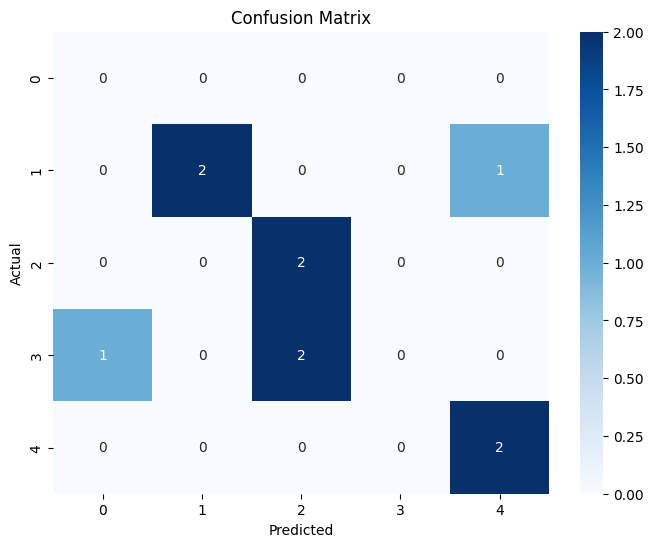


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3
           2       0.50      1.00      0.67         2
           3       0.00      0.00      0.00         3
           4       0.67      1.00      0.80         2

    accuracy                           0.60        10
   macro avg       0.43      0.53      0.45        10
weighted avg       0.53      0.60      0.53        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 8: Predict Classes
y_pred_probs = best_model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)  # predicted class indices
y_true_labels = np.argmax(y_test, axis=1)        # true class indices

# Step 9: Confusion Matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
print("\nConfusion Matrix:\n", conf_matrix)

# Step 10: Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 11: Classification Report
print("\nClassification Report:\n", classification_report(y_true_labels, y_pred_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
Best Model Accuracy on Test Set: 60.00%
Confusion Matrix:
[[0 0 0 0 0]
 [0 2 0 0 1]
 [0 0 2 0 0]
 [1 0 2 0 0]
 [0 0 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         0
       Biking       1.00      0.67      0.80         3
PlayingGuitar       0.50      1.00      0.67         2
       Typing       0.00      0.00      0.00         3
     JumpRope       0.67      1.00      0.80         2

     accuracy                           0.60        10
    macro avg       0.43      0.53      0.45        10
 weighted avg       0.53      0.60      0.53        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

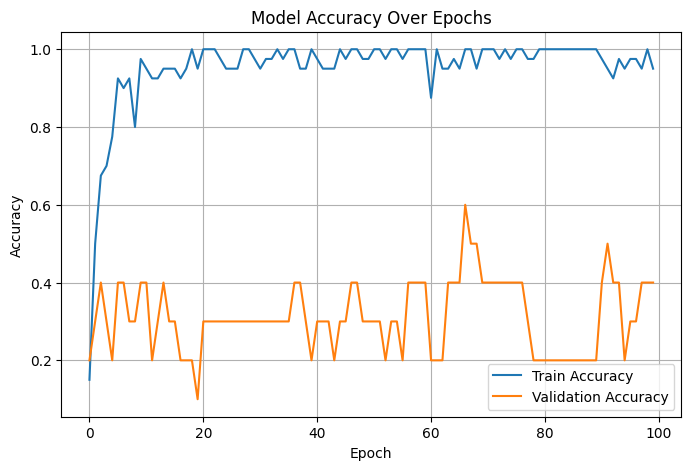

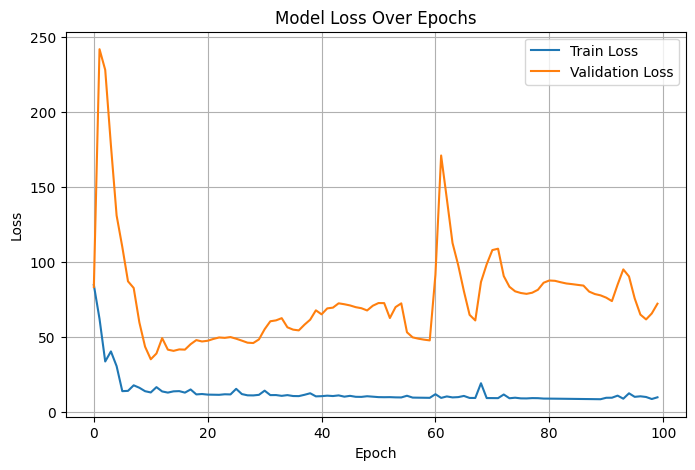

In [ ]:
# Step 9: Evaluate the Best Saved Model
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Predict and evaluate accuracy
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Best Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=SELECTED_CLASSES)
print(f"Classification Report:\n{report}")

# Step 10: Visualize the Results from Training History
# NOTE: Assumes `history` is available from training step

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 16, 7, 7, 1280) │     2,257,984 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 16, 1280)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       721,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,048,005 (11.63 MB)

 Trainable params: 790,021 (3.01 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Class weights: {0: np.float64(0.8), 1: np.float64(1.1428571428571428), 2: np.float64(1.0), 3: np.float64(1.1428571428571428), 4: np.float64(1.0)}
Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.1044 - loss: 3.7549
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 90s 3s/step - accuracy: 0.1086 - loss: 3.7536 - val_accuracy: 0.5000 - val_loss: 3.5680 - learning_rate: 1.0000e-04
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.2466 - loss: 3.6041
Epoch 2: val_accuracy improved from 0.50000 to 0.80000, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.2537 - loss: 3.6026 - val_accuracy: 0.8000 - val_loss: 3.4952 - learning_rate: 1.0000e-04
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6009 - loss: 3.4711
Epoch 3: val_accuracy did not improve from 0.80000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step - accuracy: 0.5895 - loss: 3.4716 - val_accuracy: 0.8000 - val_loss: 3.4327 - learning_rate: 1.0000e-04
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.5387 - loss: 3.3905
Epoch 4: val_accuracy did not improve from 0.80000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.5238 - loss: 3.3954 - val_accuracy: 0.6000 - val_loss: 3.3612 - learning_rate: 1.0000e-04
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.4781 - loss: 3.4437
Epoch 5: val_accuracy did not improve from 0.80000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.4824 - loss: 3.4375 - val_accuracy: 0.6000 - val_loss: 3.3004 - learning_rate: 1.0000e-04
Epoch 

1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step - accuracy: 0.8000 - loss: 3.4952
Best Model Accuracy on Test Set: 80.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
Confusion Matrix:
[[0 0 0 0 0]
 [2 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 2]]


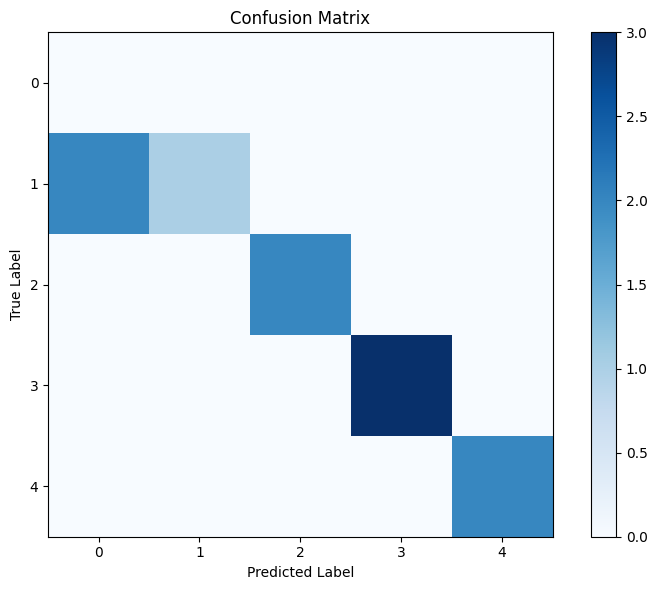


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2

    accuracy                           0.80        10
   macro avg       0.80      0.67      0.70        10
weighted avg       1.00      0.80      0.85        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, TimeDistributed, GlobalAveragePooling2D, Reshape
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Step 1: Apply Data Augmentation to the Input Data (for better generalization)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# This function will augment the frames of a video
def augment_video_frames(frames):
    augmented_frames = []
    for frame in frames:
        augmented_frame = datagen.random_transform(frame)  # Apply augmentation to each frame
        augmented_frames.append(augmented_frame)
    return np.array(augmented_frames)

# Augment the entire dataset by applying augmentation on each frame of each video
X_train_augmented = np.array([augment_video_frames(video) for video in X_train])

# Step 2: Model Architecture - Regularization (Dropout), BatchNormalization, L2 Regularization
def build_cnn_lstm_model(input_shape, num_classes):
    model = Sequential()

    # CNN layers with MobileNetV2 as feature extractor (pretrained weights)
    # input_shape[1:] extracts (height, width, channels) for MobileNetV2
    cnn_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape[1:])
    cnn_base.trainable = False  # Freeze base layers for transfer learning

    model.add(TimeDistributed(cnn_base, input_shape=input_shape))  # TimeDistributed to apply CNN to each frame
    model.add(TimeDistributed(GlobalAveragePooling2D()))  # Pooling to extract features across time

    # Add LSTM for temporal dynamics
    model.add(LSTM(128, return_sequences=False))

    # Dense layers with regularization
    model.add(Dense(512, activation='relu', kernel_regularizer='l2'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1), metrics=['accuracy'])

    return model

# Define the input shape and number of classes
input_shape = (16, 224, 224, 3)
num_classes = 5  # Change this based on your dataset

# Build and summarize the model
model = build_cnn_lstm_model(input_shape, num_classes)
model.summary()

# Step 3: Convert one-hot encoded labels to integer labels
y_train_labels = np.argmax(y_train, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Step 4: Compute Class Weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train_labels), y=y_train_labels)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# Step 5: Add Checkpoint, Learning Rate Reduction, and Early Stopping Callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

lr_reduce = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

callbacks = [checkpoint, lr_reduce, early_stop]

# Step 6: Train the Model
history = model.fit(
    X_train_augmented, y_train,
    epochs=100,
    batch_size=4,
    validation_data=(X_test, y_test),
    class_weight=class_weights,
    callbacks=callbacks
)

# Step 7: Load and Evaluate Best Model
print("\nLoading best model based on validation accuracy...")
best_model = load_model('best_model.h5')
loss, acc = best_model.evaluate(X_test, y_test)
print(f"Best Model Accuracy on Test Set: {acc*100:.2f}%")

# Step 8: Generate and Print Confusion Matrix
y_pred = best_model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
ticks = np.arange(num_classes)
plt.xticks(ticks, np.arange(num_classes))
plt.yticks(ticks, np.arange(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Step 9: Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred_labels))


1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
Best Model Accuracy on Test Set: 80.00%
Confusion Matrix:
[[0 0 0 0 0]
 [2 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 2]]
Classification Report:
               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         0
       Biking       1.00      0.33      0.50         3
PlayingGuitar       1.00      1.00      1.00         2
       Typing       1.00      1.00      1.00         3
     JumpRope       1.00      1.00      1.00         2

     accuracy                           0.80        10
    macro avg       0.80      0.67      0.70        10
 weighted avg       1.00      0.80      0.85        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


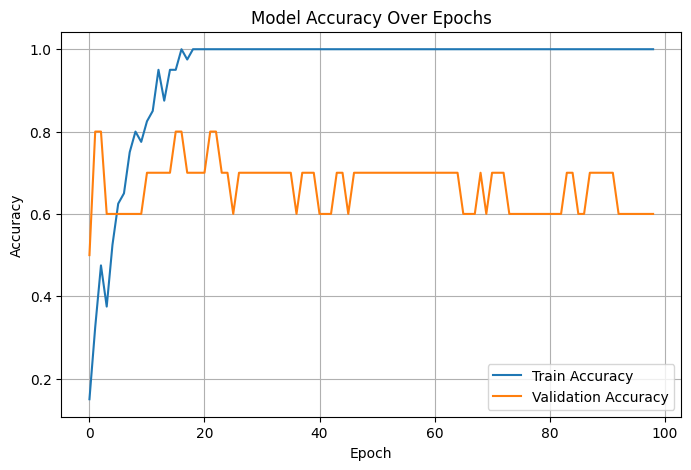

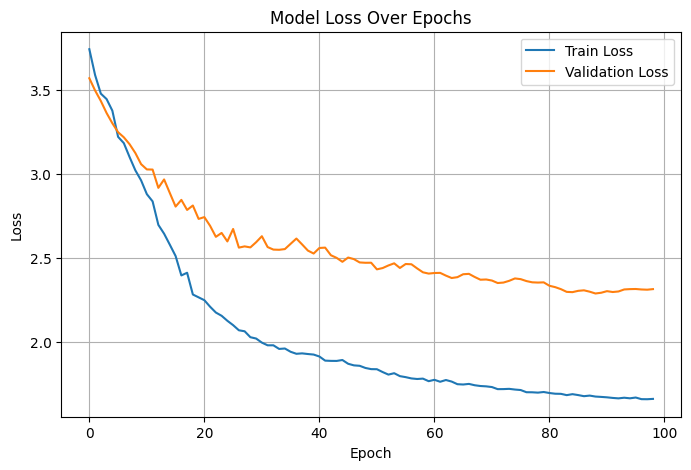

In [ ]:
# Step 9: Evaluate the Best Saved Model
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load the best model saved during training
best_model = load_model('best_model.h5')

# Predict and evaluate accuracy
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Best Model Accuracy on Test Set: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(f"Confusion Matrix:\n{cm}")

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=SELECTED_CLASSES)
print(f"Classification Report:\n{report}")

# Step 10: Visualize the Results from Training History
# NOTE: Assumes `history` is available from training step

# Plot training & validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
